In [579]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ee-769-assignment1/sample_submission.csv
/kaggle/input/ee-769-assignment1/test.csv
/kaggle/input/ee-769-assignment1/train.csv


In [580]:
#Importing libraries

import pandas as pd 
import numpy as np

# Scikit-learn library: For Logistic Regression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import GridSearchCV

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [581]:
train = pd.DataFrame(pd.read_csv('../input/ee-769-assignment1/train.csv'))
test = pd.DataFrame(pd.read_csv('../input/ee-769-assignment1/test.csv'))
train.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,...,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,...,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,...,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,...,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


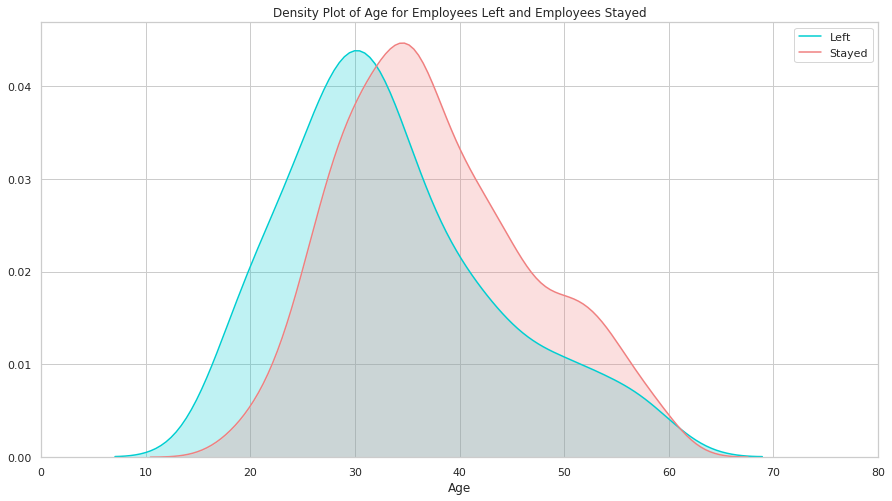

In [582]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Age"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Age"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of Age for Employees Left and Employees Stayed')
ax.set(xlabel='Age')
plt.xlim(0,80)
plt.show()

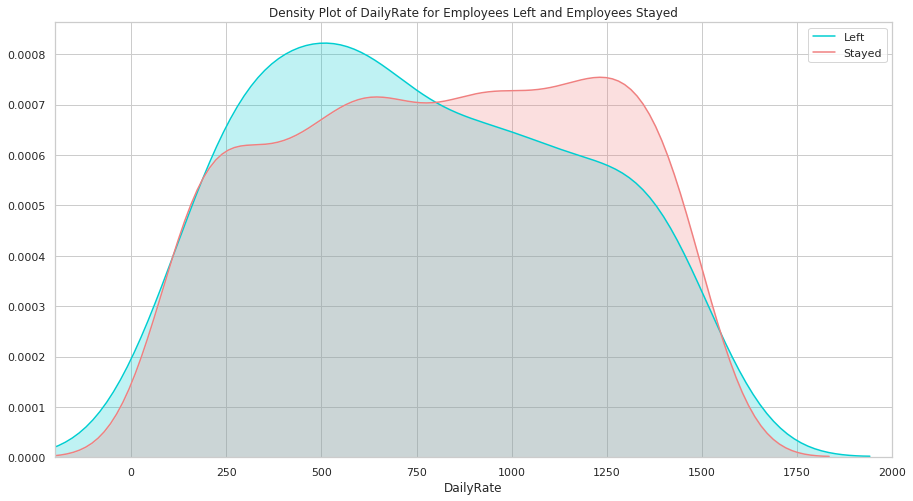

In [583]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["DailyRate"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["DailyRate"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of DailyRate for Employees Left and Employees Stayed')
ax.set(xlabel='DailyRate')
plt.xlim(-200,2000)
plt.show()

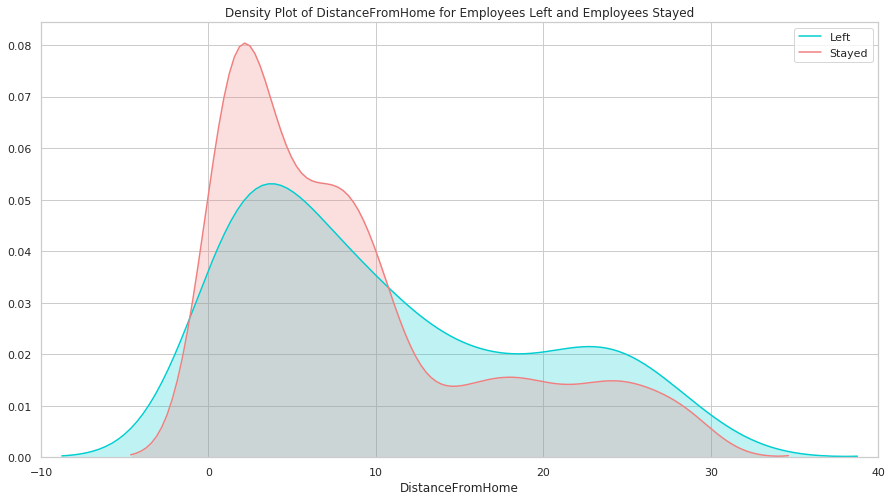

In [584]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["DistanceFromHome"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["DistanceFromHome"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of DistanceFromHome for Employees Left and Employees Stayed')
ax.set(xlabel='DistanceFromHome')
plt.xlim(-10,40)
plt.show()

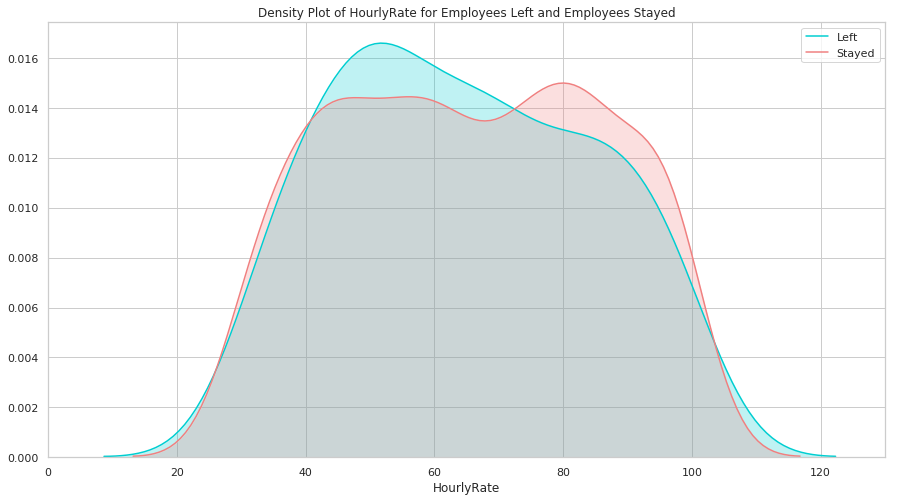

In [585]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["HourlyRate"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["HourlyRate"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of HourlyRate for Employees Left and Employees Stayed')
ax.set(xlabel='HourlyRate')
plt.xlim(0,130)
plt.show()

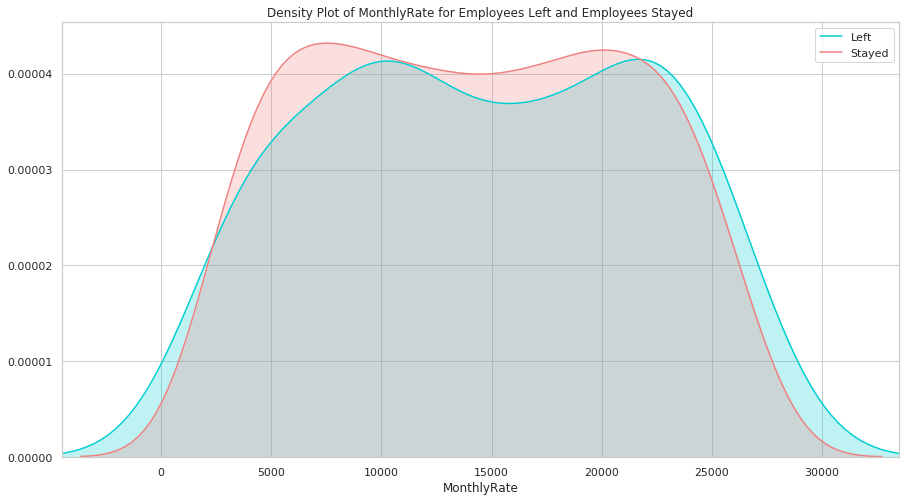

In [586]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["MonthlyRate"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["MonthlyRate"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of MonthlyRate for Employees Left and Employees Stayed')
ax.set(xlabel='MonthlyRate')
plt.xlim(-4500,33500)
plt.show()

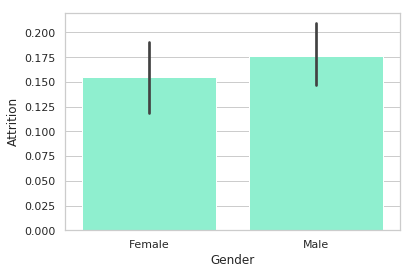

In [587]:
sns.barplot('Gender', 'Attrition', data=train, color="aquamarine")
plt.show()

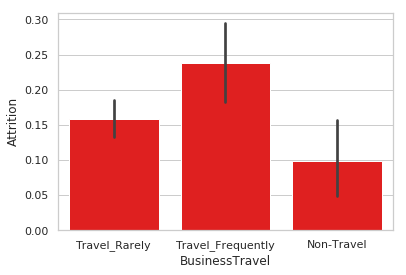

In [588]:
sns.barplot('BusinessTravel', 'Attrition', data=train, color="red")
plt.show()

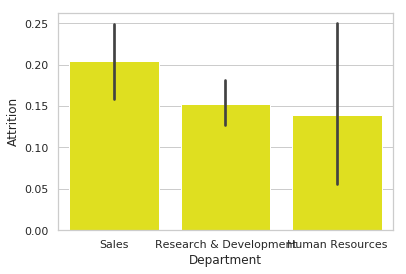

In [589]:
sns.barplot('Department', 'Attrition', data=train, color="yellow")
plt.show()

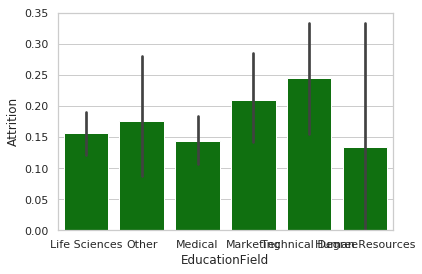

In [590]:
sns.barplot('EducationField', 'Attrition', data=train, color="green")
plt.show()

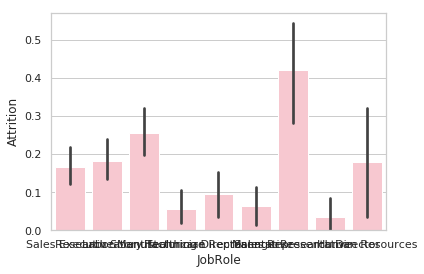

In [591]:
sns.barplot('JobRole', 'Attrition', data=train, color="pink")
plt.show()

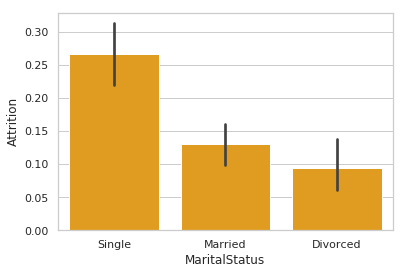

In [592]:
sns.barplot('MaritalStatus', 'Attrition', data=train, color="orange")
plt.show()

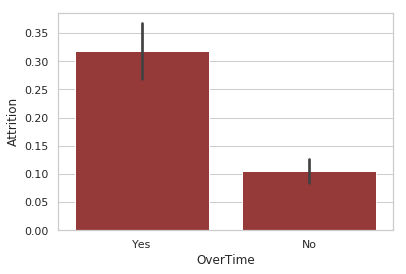

In [593]:
sns.barplot('OverTime', 'Attrition', data=train, color="brown")
plt.show()

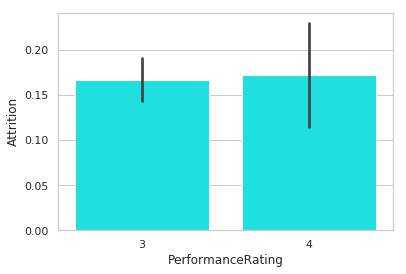

In [594]:
sns.barplot('PerformanceRating', 'Attrition', data=train, color="cyan")
plt.show()

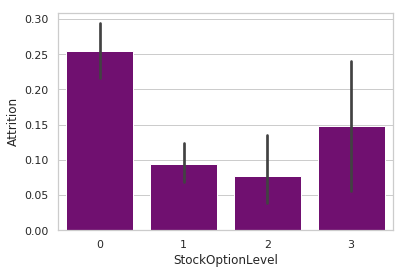

In [595]:
sns.barplot('StockOptionLevel', 'Attrition', data=train, color="purple")
plt.show()

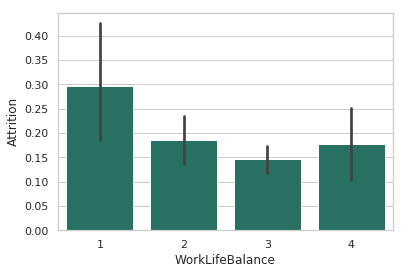

In [596]:
sns.barplot('WorkLifeBalance', 'Attrition', data=train, color="#1C7C69")
plt.show()

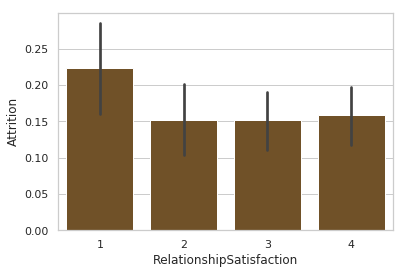

In [597]:
sns.barplot('RelationshipSatisfaction', 'Attrition', data=train, color="#7C521C")
plt.show()

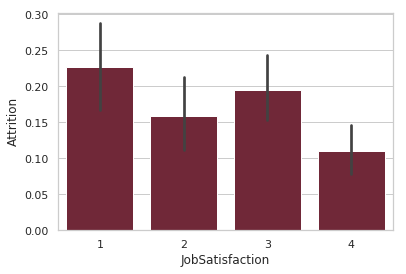

In [598]:
sns.barplot('JobSatisfaction', 'Attrition', data=train, color="#7C1C32")
plt.show()

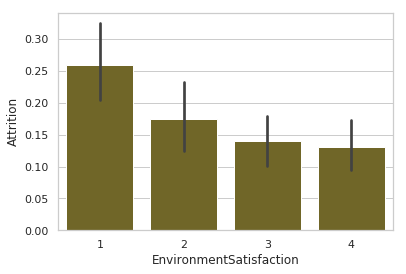

In [599]:
sns.barplot('EnvironmentSatisfaction', 'Attrition', data=train, color="#7C6F1C")
plt.show()

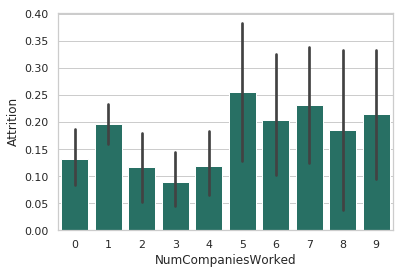

In [600]:
sns.barplot('NumCompaniesWorked', 'Attrition', data=train, color="#1C7C6C")
plt.show()

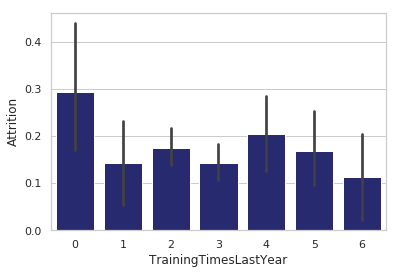

In [601]:
sns.barplot('TrainingTimesLastYear', 'Attrition', data=train, color="#1C1F7C")
plt.show()

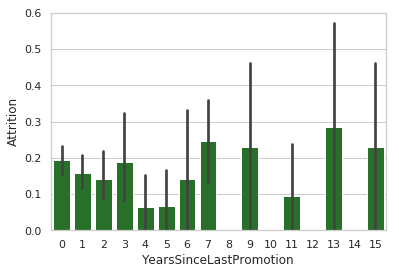

In [602]:
sns.barplot('YearsSinceLastPromotion', 'Attrition', data=train, color="#1C7C1F")
plt.show()

In [603]:
# Calculation of the correlation coefficients in pairs, with the default method:
# Pearson, Standard Correlation Coefficient
train_corr = train.corr()
# Retrieving the correlation coefficients per feature in relation to the feature class
rank = train_corr['Attrition'] 
train_rank = pd.DataFrame(rank) 
# Ranking the absolute values of the coefficients in descending order
train_rank = np.abs(train_rank).sort_values(by='Attrition',ascending=False) 
train_rank

,Attrition
Attrition,1.000000
TotalWorkingYears,0.178842
JobLevel,0.169121
Age,0.168641
MonthlyIncome,0.163709
StockOptionLevel,0.160597
YearsInCurrentRole,0.159691
JobInvolvement,0.158768
YearsWithCurrManager,0.151208
YearsAtCompany,0.133021


In [604]:
X = train.drop(["Attrition", "EmployeeCount", "PerformanceRating", "HourlyRate", "MonthlyRate", "ID", "EmployeeNumber"], axis=1)
X_test_data = test.drop(["EmployeeCount", "PerformanceRating", "HourlyRate", "MonthlyRate", "ID", "EmployeeNumber"], axis=1)
y = train["Attrition"]

In [605]:
# convert objects to numbers by pandas.get_dummies
# X = pd.get_dummies(X, columns=["Gender", "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"])
# X_test_data = pd.get_dummies(X_test_data, columns=["Gender", "BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"])
# X_test_data.shape
le=LabelEncoder()
for col in X_test_data.columns.values:
    if X_test_data[col].dtypes=='object':
       data = X[col].append(X_test_data[col])
       le.fit(data.values)
       X[col]=le.transform(X[col])
       X_test_data[col]=le.transform(X_test_data[col])

In [606]:
# Scale the training data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [607]:
# Scale the test data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_test_data)
X_test_data = scaler.transform(X_test_data)

In [608]:
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 27)
rfe = rfe.fit(X, y)

Optimal number of features: 16
Selected features: [0, 4, 9, 12, 15, 16, 17, 19, 20, 23, 24, 25, 28, 29, 30, 31]


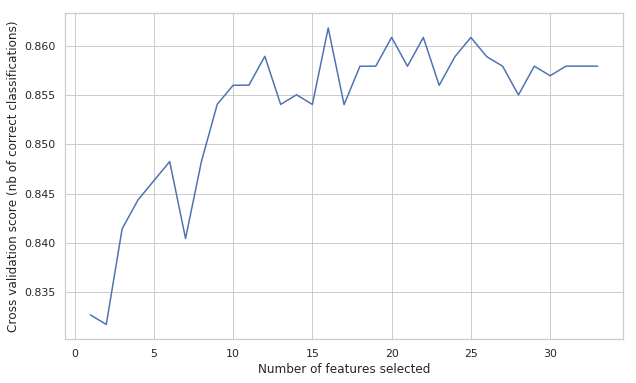

In [609]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(pd.DataFrame(X).columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.869
LogisticRegression log_loss is 0.405
LogisticRegression auc is 0.712


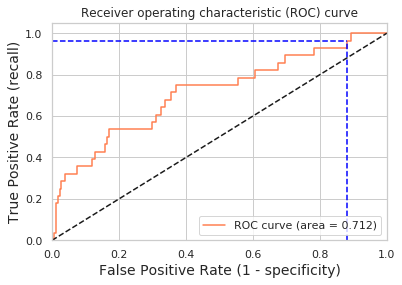

Using a threshold of 0.003 guarantees a sensitivity of 0.964 and a specificity of 0.118, i.e. a false positive rate of 88.20%.


In [610]:
# Model evaluation based on simple train/test split using train_test_split() function


# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [611]:
# Model evaluation based on K-fold cross-validation using cross_val_score() function


# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.858
LogisticRegression average log_loss is 0.348
LogisticRegression average auc is 0.827


In [612]:
# Model evaluation based on K-fold cross-validation using cross_validate() function


scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.858 (+/-0.033)
LogisticRegression average log_loss: 0.348 (+/-0.048)
LogisticRegression average auc: 0.827 (+/-0.057)


best params: LogisticRegression(C=0.10001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.10001}
best score: 0.8588996763754044


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


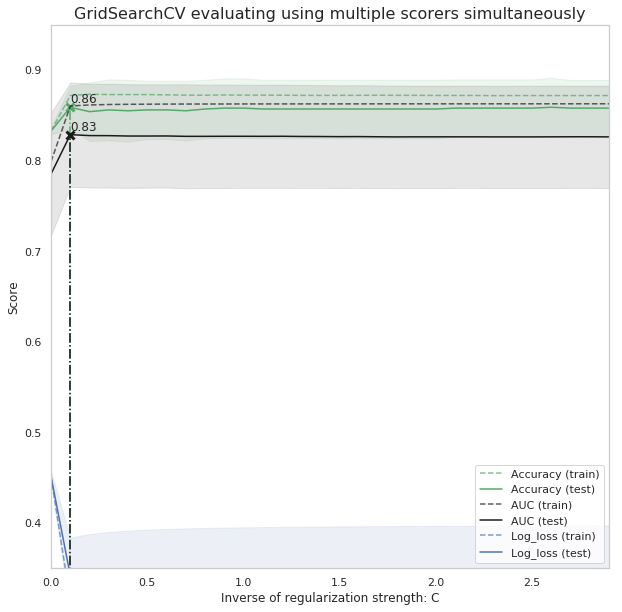

In [613]:
# GridSearchCV evaluating using multiple scorers simultaneously


param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [614]:
log_clf = LogisticRegression(C=0.10001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
log_clf.fit(X, y)
y_pred = log_clf.predict(X_test_data)
res = pd.DataFrame({"ID": test["ID"], "Attrition": y_pred})
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [615]:
with open('output.csv', 'w') as csv_file:
    res.to_csv(path_or_buf=csv_file, index = False)